In [1]:
import pandas as pd
from sqlalchemy import create_engine
from pandas_profiling import ProfileReport
import os
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
filename = 'C:/Users/user/Desktop/accepted_2007_to_2018Q4.csv'

In [5]:
csv_database = create_engine('sqlite:///csv_database.db') #using sqlite server to conserve memory for massive 2.5gb file

In [6]:
chunksize = 200000
i = 0
j = 1
for df in pd.read_csv(filename, chunksize=chunksize, iterator=True):
      df = df.rename(columns={c: c.replace(' ', '') for c in df.columns}) 
      df.index += j
      i+=1
      df.to_sql('devlendingclub30', csv_database, if_exists='append')
      j = df.index[-1] + 1

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,19,59,118) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,19,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,19,59) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=inter

In [7]:
df = pd.read_sql_query('SELECT * FROM devlendingclub30', csv_database)

In [8]:
df.shape

(2260701, 152)

In [9]:
dtypewarningcols = [19,59,118,19,118,129,130,131,134,135,136,139,145,146,147,19,59,118,129,130,131,134,135,136,139,145,146,147,129,130,131,134,135,136,139,145,146,147,19,49,59,118,129,130,131,134,135,136,139,19,49,59,129,130,131,134,135,136,139]

In [10]:
dftypewarningcols = pd.DataFrame(dtypewarningcols)
dftypewarningcols = dftypewarningcols.drop_duplicates().sort_values(by=0)
dftypewarningcols[0].tolist()

[19, 49, 59, 118, 129, 130, 131, 134, 135, 136, 139, 145, 146, 147]

In [11]:
df.iloc[:, [19, 49, 59, 118, 129, 130, 131, 134, 135, 136, 139, 145, 146, 147]].isna().sum() #list of features giving initial errors

url                               33
last_pymnt_amnt                   33
dti_joint                    2139995
sec_app_fico_range_high      2152680
hardship_flag                     33
hardship_type                2249784
hardship_reason              2249784
hardship_amount              2249784
hardship_start_date          2249784
hardship_end_date            2249784
hardship_dpd                 2249784
debt_settlement_flag              33
debt_settlement_flag_date    2226455
settlement_status            2226455
dtype: int64

In [20]:
print(df['url'].head())
print(df['last_pymnt_amnt'].head())
print(df['hardship_flag'].head())
print(df['debt_settlement_flag'].head())

0    https://lendingclub.com/browse/loanDetail.acti...
1    https://lendingclub.com/browse/loanDetail.acti...
2    https://lendingclub.com/browse/loanDetail.acti...
3    https://lendingclub.com/browse/loanDetail.acti...
4    https://lendingclub.com/browse/loanDetail.acti...
Name: url, dtype: object
0      122.67
1      926.35
2    15813.30
3      829.90
4    10128.96
Name: last_pymnt_amnt, dtype: float64
0    N
1    N
2    N
3    N
4    N
Name: hardship_flag, dtype: object
0    N
1    N
2    N
3    N
4    N
Name: debt_settlement_flag, dtype: object


In [22]:
df.iloc[:, [59, 118, 130, 131, 134, 135, 136, 139, 146, 147]].isna().sum()

dti_joint                    2139995
sec_app_fico_range_high      2152680
hardship_type                2249784
hardship_reason              2249784
hardship_amount              2249784
hardship_start_date          2249784
hardship_end_date            2249784
hardship_dpd                 2249784
debt_settlement_flag_date    2226455
settlement_status            2226455
dtype: int64

In [23]:
df = df.drop(df.columns[[59, 118, 130, 131, 134, 135, 136, 139, 146, 147]], axis = 1)

In [24]:
df.shape

(2260701, 142)

In [25]:
mis_val = df.isnull().sum()
mis_val_percent = 100 * df.isnull().sum() / len(df)

In [26]:
mis_val_percent[mis_val_percent >= 90].sort_values(ascending = False)

member_id                                     100.000000
orig_projected_additional_accrued_interest     99.617331
deferral_term                                  99.517097
hardship_status                                99.517097
hardship_last_payment_amount                   99.517097
hardship_payoff_balance_amount                 99.517097
hardship_loan_status                           99.517097
hardship_length                                99.517097
payment_plan_start_date                        99.517097
settlement_percentage                          98.485160
settlement_term                                98.485160
settlement_date                                98.485160
settlement_amount                              98.485160
sec_app_mths_since_last_major_derog            98.410139
sec_app_revol_util                             95.303050
revol_bal_joint                                95.221836
sec_app_fico_range_low                         95.221792
sec_app_earliest_cr_line       

In [27]:
mis_val_percent_index = mis_val_percent[mis_val_percent >= 90].index
mis_val_percent_index

Index(['member_id', 'desc', 'annual_inc_joint', 'verification_status_joint',
       'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_earliest_cr_line',
       'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc',
       'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'hardship_status',
       'deferral_term', 'payment_plan_start_date', 'hardship_length',
       'hardship_loan_status', 'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'settlement_date', 'settlement_amount', 'settlement_percentage',
       'settlement_term'],
      dtype='object')

In [28]:
df = df.drop(df[mis_val_percent_index], axis = 1)

In [29]:
df.shape

(2260701, 114)

In [30]:
df.head()

,index,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,1,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,2,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,3,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,4,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,5,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N


In [33]:
df.drop(df.columns[[0]], axis = 1, inplace = True)

In [35]:
df.drop(['emp_title'], axis = 1, inplace = True) #too many unique values

In [39]:
df.drop(['id'], axis = 1, inplace = True) 

In [40]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,10+ years,MORTGAGE,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,10+ years,MORTGAGE,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,10+ years,MORTGAGE,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,10+ years,MORTGAGE,...,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,3 years,MORTGAGE,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N


In [41]:
df.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
2260696,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,9 years,MORTGAGE,...,50.0,0.0,0.0,55970.0,28398.0,12300.0,42670.0,N,Cash,N
2260697,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,6 years,RENT,...,40.0,1.0,0.0,84664.0,62426.0,20700.0,58764.0,N,Cash,Y
2260698,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,10+ years,MORTGAGE,...,50.0,0.0,0.0,163804.0,44215.0,9500.0,34169.0,N,Cash,N
2260699,NaN,NaN,NaN,None,NaN,NaN,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None
2260700,NaN,NaN,NaN,None,NaN,NaN,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None


In [47]:
df_all_missing_index = df[df.isnull().all(axis=1)].index

In [48]:
df = df.drop(df_all_missing_index)

Text(0, 0.5, 'Data type')

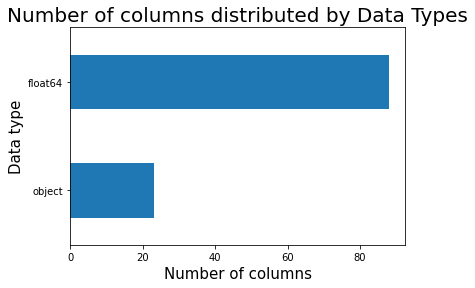

In [55]:
df.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Number of columns distributed by Data Types',fontsize=20)
plt.xlabel('Number of columns',fontsize=15)
plt.ylabel('Data type',fontsize=15)

In [56]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                          2
grade                         7
sub_grade                    35
emp_length                   11
home_ownership                6
verification_status           3
issue_d                     139
loan_status                   9
pymnt_plan                    2
url                     2260668
purpose                      14
title                     63155
zip_code                    956
addr_state                   51
earliest_cr_line            754
initial_list_status           2
last_pymnt_d                136
next_pymnt_d                106
last_credit_pull_d          141
application_type              2
hardship_flag                 2
disbursement_method           2
debt_settlement_flag          2
dtype: int64

In [57]:
df.drop(['url'], axis = 1, inplace = True) #dropping URL

In [60]:
df['emp_length'].unique()

array(['10+ years', '3 years', '4 years', '6 years', '1 year', '7 years',
       '8 years', '5 years', '2 years', '9 years', '< 1 year', None],
      dtype=object)

In [61]:
df['emp_length'].fillna(value=0,inplace=True)

In [62]:
df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)

In [63]:
df['emp_length'].unique()

array(['10', '3', '4', '6', '1', '7', '8', '5', '2', '9', 0], dtype=object)

In [64]:
df.shape

(2260668, 110)

In [67]:
df.drop(['title'], axis = 1, inplace = True)

In [73]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                      2
grade                     7
sub_grade                35
emp_length               11
home_ownership            6
verification_status       3
issue_d                 139
loan_status               9
pymnt_plan                2
purpose                  14
zip_code                956
addr_state               51
earliest_cr_line        754
initial_list_status       2
last_pymnt_d            136
next_pymnt_d            106
last_credit_pull_d      141
application_type          2
hardship_flag             2
disbursement_method       2
debt_settlement_flag      2
dtype: int64

In [82]:
df[['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,Dec-2015,Aug-2003,Jan-2019,None,Mar-2019
1,Dec-2015,Dec-1999,Jun-2016,None,Mar-2019
2,Dec-2015,Aug-2000,Jun-2017,None,Mar-2019
3,Dec-2015,Sep-2008,Feb-2019,Apr-2019,Mar-2019
4,Dec-2015,Jun-1998,Jul-2016,None,Mar-2018
...,...,...,...,...,...
2260694,Oct-2016,Dec-1999,Mar-2019,Apr-2019,Mar-2019
2260695,Oct-2016,Feb-1991,Mar-2019,Apr-2019,Mar-2019
2260696,Oct-2016,Feb-1995,Mar-2019,Apr-2019,Mar-2019
2260697,Oct-2016,Jul-1999,Oct-2017,None,Mar-2019


In [88]:
df[['issue_d']].value_counts(ascending = False)

issue_d 
Mar-2016    61992
Oct-2015    48631
May-2018    46311
Oct-2018    46305
Aug-2018    46079
            ...  
Aug-2007       74
Jul-2007       63
Sep-2008       57
Sep-2007       53
Jun-2007       24
Length: 139, dtype: int64

In [99]:
from datetime import datetime

In [118]:
df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], infer_datetime_format=True)
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], infer_datetime_format=True)
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'], infer_datetime_format=True)
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], infer_datetime_format=True)

In [119]:
print(df['issue_d']) 
print(df['earliest_cr_line']) 
print(df['last_pymnt_d']) 
print(df['next_pymnt_d']) 
print(df['last_credit_pull_d']) 

0         2015-12-01
1         2015-12-01
2         2015-12-01
3         2015-12-01
4         2015-12-01
             ...    
2260694   2016-10-01
2260695   2016-10-01
2260696   2016-10-01
2260697   2016-10-01
2260698   2016-10-01
Name: issue_d, Length: 2260668, dtype: datetime64[ns]
0         2003-08-01
1         1999-12-01
2         2000-08-01
3         2008-09-01
4         1998-06-01
             ...    
2260694   1999-12-01
2260695   1991-02-01
2260696   1995-02-01
2260697   1999-07-01
2260698   1996-06-01
Name: earliest_cr_line, Length: 2260668, dtype: datetime64[ns]
0         2019-01-01
1         2016-06-01
2         2017-06-01
3         2019-02-01
4         2016-07-01
             ...    
2260694   2019-03-01
2260695   2019-03-01
2260696   2019-03-01
2260697   2017-10-01
2260698   2019-03-01
Name: last_pymnt_d, Length: 2260668, dtype: datetime64[ns]
0                NaT
1                NaT
2                NaT
3         2019-04-01
4                NaT
             ...    
22606

In [120]:
df.drop(['zip_code'], axis = 1, inplace = True) 

In [121]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                     2
grade                    7
sub_grade               35
emp_length              11
home_ownership           6
verification_status      3
loan_status              9
pymnt_plan               2
purpose                 14
addr_state              51
initial_list_status      2
application_type         2
hardship_flag            2
disbursement_method      2
debt_settlement_flag     2
dtype: int64

In [123]:
df.shape

(2260668, 108)